# Journal - O1
### ITMAL - Machine Learning
#### Aarhus Universitet
#### Dato: 25-02-2021
### Lecture L01, L02 and L03
#### Group 36: 
- Alexander Smith Mølholm 201806566 
- Randi Mikkelsen Bech 201805690

## L01 - intro
In this task we will look at different models; Linear regression, k-Nearest Neighboor and Multi-Layer Perceptron for regression. We will look at the individual models and analyze across the models.

We startup by reusing parts of `01_the_machine_learning_landscape.ipynb` from Géron [GITHOML]
Here we for example make sure this notebook works well in both python 2 and 3 and merge the OECD's life satisfaction data and the IMF's GDP per capita data. Then the data is plottet and we create a model called LinearRegression and train the model. After this we extract a predicted $\mathbf{y}_{pred}~$ from the model, for some input scalar `x=22587`. The results from the linear regression is also plottet.


#### Setup
Below is code from section "Setup"

In [24]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # ITMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


#### Code example 1-1
Below is code from section "Code example 1-1"

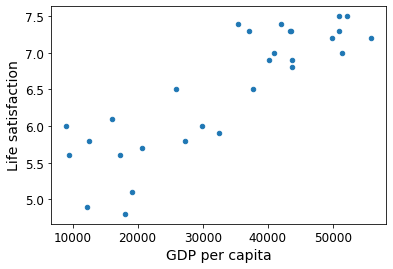

[[5.96242338]]


In [25]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

import os
datapath = os.path.join("../datasets", "lifesat", "")

# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"ITMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

#### ITMAL
Below is code from "ITMAL" section:

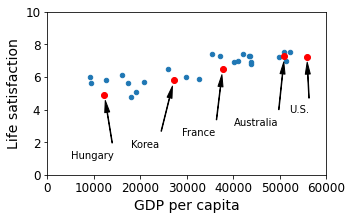

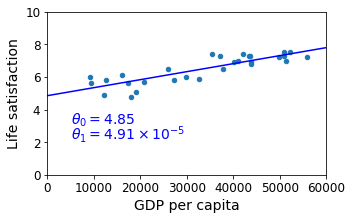

In [26]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

### Qa) The $\theta$ parameters and the $R^2$ Score
In this task we extract the $\theta_0$ and $\theta_1$ coefficients from the life-satisfaction figure from the linear regressin model above. This is done via the models python attributes:

In [27]:
theta_0 = model.intercept_
theta_1 = model.coef_[0]

print("Theta_0 = ", theta_0)
print("Theta 1 = ", theta_1)

Theta_0 =  [4.8530528]
Theta 1 =  [4.91154459e-05]


We also extract the $R^2~$ score for the model using data (X,y). 
The $R^2~$ score is a measurement of how well the model predicts the ground truth (measurement of fitness/goodness). The best score is 1.0 and then it can worsen into the negatives. Score is a fitness/goodness measurement

The code for extracting the score is shown here within a print statement:

In [28]:
print("R^2 = ", model.score(X,y))

R^2 =  0.7344414355437029


The result of the score is fine for this model. It is close to 1.0, which is what we want. This score we find acceptable for our model.

### Qb) Using k-Nearest Neighbors
In this task we are changing the regression model to a model using `sklearn.neighbors.KNeighborsRegressor`(https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor). Here we start with the k parameter being the value of 3.

This is the data given in the task:

In [75]:
# this is our raw data set:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [76]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


We start by preparing the data for X and y, and visualize it by plotting it.
Then we define our new model `knn`, train it with `fit()` and find our `y_pred`.

X.shape= (29, 1)
y.shape= (29, 1)


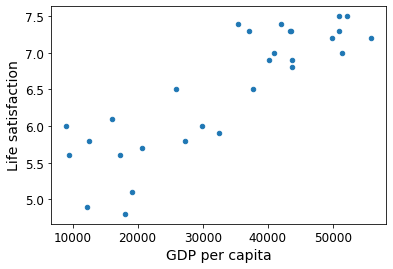

[[5.76666667]]


In [29]:
from sklearn import neighbors

# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Here we select model and train it with the fit method:
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(X,y)

# Here we predict:
X_new = [[22587]]  
y_pred = knn.predict(X_new)
print(y_pred) 

Our `y_pred` (Cyprus) result for this model is ~5.77 where the `y_pred` for our linear model was ~5.96. From this we see that the to values are very close.

We now find the score, to compare it to the linear regression model:

In [30]:
#Here we find the score:
print(knn.score(X,y))

0.8525732853499179


As seen in the output we get a score of 0.8525732853499179.

Since both the linear regression model and the k-Nearest neighbor model both use the $R^2~$ the models can be compared by this score.
When we look at the score and compare it with the score of the linear regression model, we see, that this new score is closer to the best psosible score of 1.0. So by looking at this, we see that the k-Nearest neighbor model with k=3 is closer to the ground truth, than the linear model. The reason for this is that this new model is only looking at the nearest samples, where the linear model has to look at the samples as a whole. So if a sample is longer away from all the other samples, this will have a much bigger effect on the linear model, than om the k-Nearest neighbor model.

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check
In this task we will look closer at the k-Nearest neighbor model. We have this by choosing different values for the paramter k. Here we chose k=1 and k=20. We make a model for each and train it. Then we have plotted the `y_pred` for the linear model and the k-Nearest neighbor model from earlier along with our two new versions of the k-Nearest neighbor model.


score for knn1:  1.0
score for knn20:  0.5523762709199536


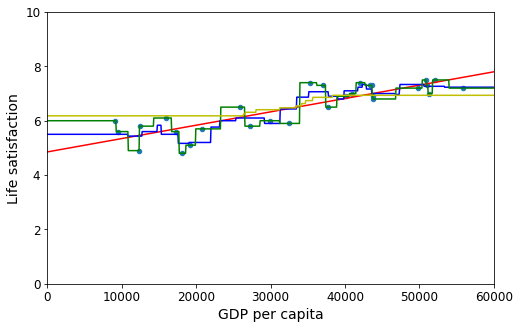

In [31]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5))
plt.axis([0, 60000, 0, 10])

# creating a test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)

# using plt.plot to plot x-y into the sample_data plot
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

# New knn models with k=1 k=20
knn1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)
knn1.fit(X,y)

knn20 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=20)
knn20.fit(X,y)

#Finding predictions for knn1 and knn20:
y_pred_knn1 = knn1.predict(M)
y_pred_knn20 = knn20.predict(M)

#Finding scores for knn1 and knn20:
print("score for knn1: ", knn1.score(X,y))
print("score for knn20: ", knn20.score(X,y))


## Adding knn1 og knn20 to the plot:
plt.plot(m, y_pred_knn1, "g")
plt.plot(m, y_pred_knn20, "y")


As we see in the output the score of knn1 = 1.0, which is the highest possible score. But we do not see this as good or that this model is the preferred estimator for the job. The knn1 model is only looking at one sample to make it's prediction, which only gives the exact values of the actual smaples. When we look at a model, we prefer a model which is looking at different samples and make the prediction from this. This is more true, since it is unlikely that the data we put into the model is the exact same data as the sample data.
If we try to predict a Life satisfaction from a GDP, that is much higher or lower than the values in the dataset, we will get a inaccurate result.

But on the other hand if we look at knn20 (yellow line) and this score of 0.55, we do not see this as a good model either. Here the model looks at too many samples to make a prediction, which is resulting in results, which can be far from the truth.

### Qd) Trying out a Neural Network
In this task we try a Neural Network on the data, by using the Scikit-learns Multi-Layer Perceptron for regression (MLPRegressor). 
Since the dataset for the MLP is not scaled well, we will tweak a lot of parameters in the MLP just to try and get some sensible output. 
So below we try training the MLP regression model, predict the `y_pred` (Cyprus), and the score.

score:  -4.706274153814735


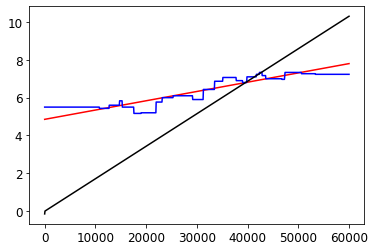

In [33]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='lbfgs', activation='relu', tol=1E-5, max_iter=100000, verbose=False)
mlp.fit(X,y.ravel())

# MLP regressor prediction and reduing the plots
y_pred_mlp = mlp.predict(M) 
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# MLP regressor score
print("score: ", mlp.score(X,y.ravel()))

As we run this code we see a different output each time.
Here are some of the results we got on the score: ~-4.706, ~2.22, ~0.08, ~0.73

The formular to get the score is the same as with previous models, so the score can be compared.
Neural networks are trained in a random pattern instead of a statistical. This means that each time the model is retrained the score can change.

In [34]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## L01 - modules_and_classes
In this task we will look at using modules, calling functions from the modules and reloading/recompiling them. We will also look at Python classes and their structure for private/public functions, constructors/destructors and how to serialize classes.

### Qa) Load and test the `libitmal` module
In this task we try out the `libitmal` module from [GITMAL] and run the function from the module. To do this we have set up the `PYTHONPATH` by using the command (on windows):

```bash
CMD> setx.exe PYTHONPATH "C:\Users\<username>\source\repos\MAL_MachineLearning\itmal"
```
with the username matching each group member.

The code for importing the module and running the function:

In [36]:
from libitmal import utils as itmalutils
itmalutils.TestAll()

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


### Qb) Create your own module, with some functions, and test it
In this task we make our own module called `dummy` with some dummy functionality.
This module is placed inside the libitmal with the path
```bash
"C:\Users\<username>\source\repos\MAL_MachineLearning\itmal\libitmal\dummy.py" 
```
with the username matching each group member.

Below is the import of the module and run of the function:

In [37]:
from libitmal import dummy
dummy.dummy_function()

This is a message inside the class.
You are a dummy function!


### Qc) How do you 'recompile' a module?
To force the Jupyter notebook to reload the module changes we write: 

In [39]:
import importlib
importlib.reload(dummy)

This is a message inside the class.


<module 'libitmal.dummy' from 'C:\\Users\\randi\\source\\repos\\MAL_MachineLearning\\itmal\\libitmal\\dummy.py'>

### Qe) Extend the class with some public and private functions and member variables
In this task we will look at classes in Python.

Private functions and variables are represented by the prefix of a double underscore "__".

`self` is a reference to the object that calls the method. A reference to itself.
Through the `self` the class is able to access the class atributes. As shown in the method `print_myvar`: 

In [40]:
class MyClass:
    __myvar = "This is private variable"

    def __privateFun(self):
        print(self.__myvar)
            
    def callPrivateFun(self):
        self.__privateFun()
        
myobjectx = MyClass()

myobjectx.callPrivateFun()

This is private variable


If we remove the `self` in the functions parameters, we will get an error for calling the resprective functions with one argument, when zero is expected. We see this because we make an object of the class and then call the respective function on that object, which here will automatically send a reference of itself. 
This is demostrated below with a demo class:

In [41]:
class MyClassDemo:
    __myvar = "This is private variable"

    def __privateFun():
        print(__myvar)
            
    def callPrivateFun():
        __privateFun()
        
mydemoobjectx = MyClassDemo()

mydemoobjectx.callPrivateFun()

TypeError: callPrivateFun() takes 0 positional arguments but 1 was given

### Qf) Extend the class with a Constructor
In this task we will define a constructor in a Python class. In python classes the constructor is the `__init__` function:

In [42]:
class MyClassWithCTOR:
    def __init__(self):
        print("This is a message from the constructor")
    
    def myfun(self):
        print("This is a message inside the class.")
        
obj = MyClassWithCTOR()

obj.myfun()

This is a message from the constructor
This is a message inside the class.


As we see from the output the print statement from the constructor is printed as soon as the the object `obj` is created of the class.
##### Destructor
There is a destructor in Python called `__del__`, but this is not used often, since Python already handles garbage collection.

### Qg) Extend the class with a to-string function
In this task we will serialize a class. This is done by using the library pickle. By using the method .dumps we are able to get a serialized version of `myObj`. This object is then printed to the console, but could as well have been saved to a text file. Pckle is also able to deserialize the object by using the method .loads. THis is illustrated by the changing the variable `a_string` and then printing both the original instance of `myObj` and the deserialized object and comparing these. 

In [43]:
import pickle

class example_class:
    a_number = 24
    a_string = "Hello"
    a_list = [1,2,3]
    a_tuble = (4, 2)
    
myObj = example_class()

mySerializedObj = pickle.dumps(myObj)
print(f"This has been serialized:\n {mySerializedObj}\n")

myObj.a_string = "Goodbye"

unSerializedObj = pickle.loads(mySerializedObj)
print(f"This has been unserialized:\n {unSerializedObj.a_string}\n")
print(f"This is the original that was altered:\n {myObj.a_string}\n")

This has been serialized:
 b'\x80\x04\x95!\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\rexample_class\x94\x93\x94)\x81\x94.'

This has been unserialized:
 Hello

This is the original that was altered:
 Goodbye



In [44]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## L02 - cost_function
In this task we will look at the basic implementation of the $\norm{1}$ and $\norm{2}$ functions as well as using numpy's dot oprator for the $\norm{2}$. We also look at the RMSE and MAE functions and how they can use the $\norm{1}$ and $\norm{2}$ functions. Last we will add some eroor handling code to the functions.

### Qa) Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.
In this task we will construct and print the X matrix. by using numpy's `np.array` as a matrix container.
The $\mathbf{x}^{(i)}$'s:
$$
\newcommand\rem[1]{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no newlines in defs}
     \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\scriptsize #1}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\mbox{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\mbox{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\mbox{\scriptsize test}}}
    \def\powtrain{\pown{\mbox{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
$$
$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$
Constructing and print:

In [45]:
import numpy as np
y = np.array([1,2,3,4])

X = np.array([[1, 2, 3], [4, 2, 1], [3, 8, 5], [-9, -1, 0]])
print(X)

[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


### Qb) Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.
In this task we will implement $\norm{1}$ and $\norm{2}$, by using primitive/build-in functions. To implement $\norm{1}$ we look at the definition of the norm:
$$
    \norm{1}:~~ ||\bx||_1 = \sum_i |x_i|
$$
The implementation:

In [46]:
def L1(x_i):
    assert isinstance(x_i, np.ndarray) #Qe
    sum = 0
    for x in x_i:
        sum += np.fabs(x)
    return sum

To implement $\norm{2}$ we look at the definition of the norm:
$$
    \norm{2}:~~ ||\bx||_2 = \left( \sum_{i=1}^{n} |x_i|^2 \right)^{1/2}\\
$$
The implementation:

In [47]:
def L2(x_i):
    assert isinstance(x_i, np.ndarray) #Qe
    sum = 0
    for x in x_i:
        sum += np.fabs(x)**2.0
    return sum**0.5

Now we test the norms against the build-in function `numpy.linalg.norm`:

In [48]:
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

libfunc = np.linalg.norm(tx-ty)
print(libfunc)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9
assert np.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert np.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

4.242640687119285
tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0


Now we will optimize the $\norm{2}$, such that we use numpy's dot operator instead of an explicit sum and then test the function:

In [49]:
def L2Dot(x_i):
    assert isinstance(x_i, np.ndarray) #Qe
    sum = np.dot(x_i, x_i)
    return sum**0.5

d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert np.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 

d2dot-expected_d2= 0.0


### Qc) Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML])
In this task we will construct the RMSE function and evaluate it using the X matrix and y from Qa.
To construct the RMSE function we start by constructing the MSE function using the $\norm{2}$ from above. Then we use MSE to construct the RMSE function:

In [50]:
def MSE(pred, true):
    assert len(pred) == len(true)
    sum = L2(pred-true)
    return 1/len(pred)*sum**2
    

def RMSE(pred, true):
    assert len(pred) == len(true)
    return MSE(pred, true)**0.5

A dummy hypothesis fundtion is implemented, which takes the first column of X as its prediction:

In [51]:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

Then we will call the RMSE function and test it:

In [52]:
r=RMSE(h(X),y)

# Testing:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert np.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

RMSE=6.576473218982953, diff=2.6645352591003757e-15


### Qd) Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it
In this task we wil construct the MAE function, by using the $\norm{1}$ from above:

In [54]:
def MAE(h, y):
    result = 1/len(h)*L1(h-y)
    return result

Calling the function and testing it:

In [55]:
r=MAE(h(X), y)

# Testing:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert np.fabs(r-expected)<eps, "MAE dist seems to be wrong"

MAE=3.75, diff=0.0


### Qe) Robust Code
In this task we will make error checking code, that checks for the right sizes of $\hat\by$-$\by$ sizes in the MSE and MAE functions:

In [56]:
assert len(h(X))==len(y), "Rows and columns do not match"

We also added error checking to all our previously tested $\norm{1}$ and $\norm{2}$ functions and reran all the tests. This error checking code is shown in section Qb with a `#Qe` comment.

### Qf) Conclusion
The tasks has made us learn how the $\norm{1}$ and $\norm{2}$ functions is constructed in a basic way without using any methods from libraries, but only with primitive/build-in functions.

We also learned to use the calculations of RMSE and MAE to give a generel evaluation of the programs quality. The tasks has challenged us in the implementation and this has given a better understanding of how the calculations is to be understood. This task has also given a better understanding of how $\norm{1}$ and $\norm{2}$ functions is used for the calculations of MSE and MAE.

We also learned how to do error handling on vectors and matrix, which we see beeing very usefull for the future work in machine learning.

In [57]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## L02 - dummy_classifier
In this task we look at the MNIST data-set and how to split this into some train and test sets. We will also look at how to use classifiers and their implementation and extracteíng different types of scores.

### Qa) Load and display the MNIST data
In this task we load the MNIST data-set with the `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. To be able to reuse the loading of the data-set we will do it inside a function called `MNIST_GetDataSet()`:

In [58]:
from sklearn.datasets import fetch_openml

def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', return_X_y = True)
    X = X / 255.
    return (X,y)

X, y = MNIST_GetDataSet()

We will now plot a single digit from the data-set:

Digit:  5


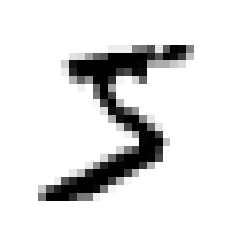

In [59]:
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    
MNIST_PlotDigit(X[0])
print("Digit: ", y[0])

### Qb)  Add a Stochastic Gradient Decent [SGD] Classifier
In this task we wil create a train-test data-set and then add the `SGDClassifier`. So first we split our data into some test- and train-data and find the category-5 y inputs to create a binary-classifier, which will enable us to classify a particular data sample:

In [60]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == '5')
y_test_5  = (y_test == '5')

To use the classifier we need to reshape the MNIST X-data to ensure the size of the data is the same as the ones we will compare with later:

In [61]:
print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

X.shape=(70000, 784)
X.shape=(70000, 784)


Adding the `SGDClassifier`:

In [62]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Now we will test the model using the test data. First we try to plot som numbers, that have been categorized correctly:

array([ True])

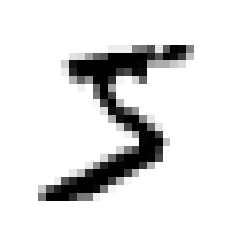

In [63]:
MNIST_PlotDigit(X[0])
sgd_clf.predict([X[0]])

array([ True])

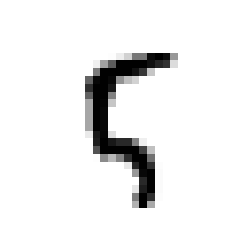

In [64]:
MNIST_PlotDigit(X[100])
sgd_clf.predict([X[100]])

Now we will look at som incorrectly categorized numbers:

array([False])

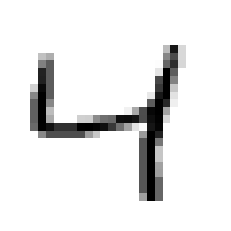

In [65]:
MNIST_PlotDigit(X[2])
sgd_clf.predict([X[2]])

array([False])

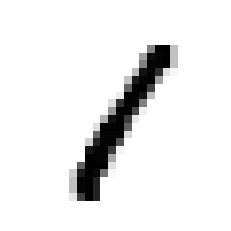

In [66]:
MNIST_PlotDigit(X[3])
sgd_clf.predict([X[3]])

### Qc) Implement a dummy binary classifier
In this task we will create a Scikit-learn compatible estimator implemented via a Python class.

In our class we want to implement the functions `fit()` and `predict()`. 
Code for our DummyClassifier:

In [67]:
from sklearn.base import BaseEstimator
import numpy as np

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

We will now instantiate a `DummyClassifier` object and call the `fit()` and `predict` on the object:

In [68]:
dummyObj = DummyClassifier()
dummyObj.fit(X_train, y_train_5)
dummyObj.predict(X_test)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Then the accuracy score is extracted by using the `sklearn.metrics.accuracy_score` function:

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_5, dummyObj.predict(X_test))

0.9108

We wil also find the cross value score for both the `DummyClassifier` and the `SGDClassifier` to compare:

In [70]:
from sklearn.model_selection import cross_val_score
print("cross_val_score for SGDClassifier: ")
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

cross_val_score for SGDClassifier: 


array([0.9748, 0.9657, 0.9692])

In [71]:
print("cross_val_score for DummyClassifier: ")
cross_val_score(dummyObj, X_train, y_train_5, cv=3, scoring="accuracy")

cross_val_score for DummyClassifier: 


array([0.91125, 0.90855, 0.90915])

Here we see that the scores from the classifiers are very close to each other. If we calculate the average of the three scores in each, we see that the SGDClassifier has a higher score than the DummyClassifier. This means the SGDClassifier is better than the DummyClassifier.

### Qd) Conclusion
In this task we learned how to load public data-sets and split the data-set into a training set and a testing set. With training the data-set we also learned to use the SGDClassifier and to implement one ourselves (DummyClassifier). By using this split data-set we learned how to train the model on the training sets and the try and test the model with the test set. Here we tested the data by predicting some data set from a certain label/number.

We also looked at different types of scores and to compare the SGDClassifier and the DummyClassifier by these.

Since we know that the DummyClassifier predicts false on everything, it is expected tahat the model will get a score of around 0.90, since only about 10% of the dataset contains the value of 5.

In [72]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## L02 - performance_metrics

In this task we wil look at different performance metrics and look at the implementation of these to compare with Sci-ki learns. Then we will lok af confusion matrices and how they can be visualized.

#### Qa Implement the Accuracy function and test it on the MNIST data.

For a given model the score is not the only important measurement to consider when evaluating its performance. Another parameter is the accuracy. The Scikit-lean library contains a method to calculate the accuracy, but we will try creating a function to ourselves. 

The function will take a set of predictions and a set of true values of equal size.

To test our function we will use the MNIST data loader. The function will be tested using both the dummy classifier and the Stochastic Gradient Descent classifier (SGDClassifier). This should show us why looking only at the score might give an incorrect assummption of the ability of ones model.



We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

First we load the data into the variables X and y for later use

In [73]:
#Reusing MNIST loader:
from sklearn.datasets import fetch_openml
from sklearn.base import BaseEstimator
def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', return_X_y = True)
    X = X / 255.
    return (X,y)
X, y = MNIST_GetDataSet()

Here we define the accuracy function. In case the numerator or denominator is zero we either throw an error or return a 0 to avoid zero-division.

In [78]:
def MyAccuracy(y_true, y_pred):
    assert len(y_true) != 0, "Lenght of y_true is zero - zero-division error!"
    truePositive = 0
    trueNegative = 0
    for y_p, y_t in zip(y_pred, y_true):
        if y_t and y_p:
            truePositive += 1
        elif not y_t and not y_p:
            trueNegative += 1
    truePredictions = trueNegative + truePositive
    if truePredictions == 0:
        print("Found no mathces! Avoiding zero-division! returning 0")
        return 0
    return (truePredictions / len(y_true))

Now we create the classifiers:

In [79]:
#reused code from dummy
import numpy as np
class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_test_5  = (y_test == '5')
y_train_5 = (y_train == '5')

#Creating SGD Classifier object
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
y_pred_sgd = sgd_clf.predict(X_test)

#Creating dummy clasifier object
dummyObj = DummyClassifier()    
dummyObj.fit(X_train, y_train_5)
y_pred = dummyObj.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    a1 = accuracy_score(y_true, y_pred)
    a0 = MyAccuracy(y_true, y_pred)
    

    print(f"MyAccuracy = {a0}")
    print(f"scikit-learn Accuracy = {a1}")

    eps = 1E-9
    assert np.fabs(a0 - a1) < eps, "The accuracy score from MyAccuracy is different from sklearn.metrics.acurracy_score"

print("Using Dummy Classifier:")
TestAccuracy(y_test_5, y_pred)

print("\nUsing SGDClassifier:")
TestAccuracy(y_test_5, y_pred_sgd)

Using Dummy Classifier:
MyAccuracy = 0.9108
scikit-learn Accuracy = 0.9108

Using SGDClassifier:
MyAccuracy = 0.9769
scikit-learn Accuracy = 0.9769


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

There are even more parameters to consider when evaluating a model. These parameters could be the Precision, the Recall or the FnScore. We will implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn.

In [87]:
def MyPrecision(y_true, y_pred):
    truePositive = 0.0
    falsePositive = 0.0
    for y_p,y_t in zip(y_pred, y_true):
        if y_t and y_p:
            truePositive += 1.0
        if not y_t and y_p:
            falsePositive += 1.0
    if (truePositive + falsePositive) == 0.0:
        return 0.0   
    return (truePositive / (truePositive + falsePositive))   

def MyRecall(y_true, y_pred):
    truePositive = 0.0
    falseNegative = 0.0
    for y_p,y_t in zip(y_pred, y_true):
        if y_t and y_p:
            truePositive += 1.0
        if y_t and not y_p:
            falseNegative += 1.0
    if (truePositive + falseNegative) == 0.0:
        return 0.0
    return (truePositive / (truePositive + falseNegative))
    
def MyF1Score(y_true, y_pred):
    p = MyPrecision(y_true, y_pred)
    r = MyRecall(y_true, y_pred)
    if (p + r) == 0.0:
        return 0.0
    return ((2*p*r) / (p + r))

Now we will test the functions using the SGDClassifers prediction and the dummy clasifiers predictions and comparing them all to the Scikit libraries functions

In [88]:
print("Dummy classifier test results:")
print(f"MyPrecision \t\t = {MyPrecision(y_test_5, y_pred)}")
from sklearn.metrics import precision_score
print(f"sklearn precision \t = {precision_score(y_test_5, y_pred)}")

print(f"MyRecall \t\t = {MyRecall(y_test_5, y_pred)}")
from sklearn.metrics import recall_score
print(f"sklearn Recall \t\t = {recall_score(y_test_5, y_pred)}")

print(f"MyF1Score \t\t = {MyF1Score(y_test_5, y_pred)}")
from sklearn.metrics import f1_score
print(f"sklean F1 \t\t = {f1_score(y_test_5, y_pred)}")


print("\nSGD classifier test results:")
print(f"MyPrecision \t\t = {MyPrecision(y_test_5, y_pred_sgd)}")
from sklearn.metrics import precision_score
print(f"sklearn precision \t = {precision_score(y_test_5, y_pred_sgd)}")

print(f"MyRecall \t\t = {MyRecall(y_test_5, y_pred_sgd)}")
from sklearn.metrics import recall_score
print(f"sklearn Recall \t\t = {recall_score(y_test_5, y_pred_sgd)}")

print(f"MyF1Score \t\t = {MyF1Score(y_test_5, y_pred_sgd)}")
from sklearn.metrics import f1_score
print(f"sklean F1 \t\t = {f1_score(y_test_5, y_pred_sgd)}")

Dummy classifier test results:
MyPrecision 		 = 0.0
sklearn precision 	 = 0.0
MyRecall 		 = 0.0
sklearn Recall 		 = 0.0
MyF1Score 		 = 0.0
sklean F1 		 = 0.0

SGD classifier test results:
MyPrecision 		 = 0.9460188933873145
sklearn precision 	 = 0.9460188933873145
MyRecall 		 = 0.7858744394618834
sklearn Recall 		 = 0.7858744394618834
MyF1Score 		 = 0.8585425597060625
sklean F1 		 = 0.8585425597060625


From the output we see the results from our own performance metrics and matches those from the sci-kit learns performance metrics. In conclusion we can expect our performance metrics to be correct, but the sci-kit learn performance metrics are easier to use in the future.

### Qc) The Confusion Matrix

To create a visual representation of the performance in our model we can create what is called a confusion matrix. This will be done by using the `scklearn.metrics.confusion_matrix` function. This is shown below.

It is important to pass the parameters in the correct order. Failing to do so will result in a misrepresentation of the data. 

In [89]:
from sklearn.metrics import confusion_matrix

y_train_pred = dummyObj.predict(X_train)
y_train_pred_sgd = sgd_clf.predict(X_train)

print("confusion_matrix(y_train_5, y_train_pred):")
M_dummy = confusion_matrix(y_train_5, y_train_pred)
print("M_dummy:\n", M_dummy)
M_SGD = confusion_matrix(y_train_5, y_train_pred_sgd)
print("\nM_SGD:\n", M_SGD)

print("\nReverse parameters:")
M_dummy_reverse = confusion_matrix(y_train_pred, y_train_5)
print("M_dummy_reverse:\n", M_dummy_reverse)
M_SGD_reverse = confusion_matrix(y_train_pred_sgd, y_train_5)
print("\nM_SGD_reverse:\n", M_SGD_reverse)

confusion_matrix(y_train_5, y_train_pred):
M_dummy:
 [[54579     0]
 [ 5421     0]]

M_SGD:
 [[54305   274]
 [ 1183  4238]]

Reverse parameters:
M_dummy_reverse:
 [[54579  5421]
 [    0     0]]

M_SGD_reverse:
 [[54305  1183]
 [  274  4238]]


As we see from the outpu we see that in the reverse confusion matrix the values of FN (false negatives) and FP (false positives) switches places.

### Qd) A Confusion Matrix Heat-map

To visualize the confusion matrices a heat map is constructed.

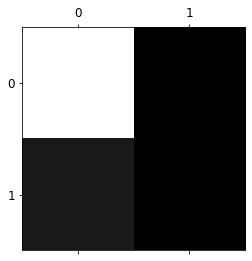

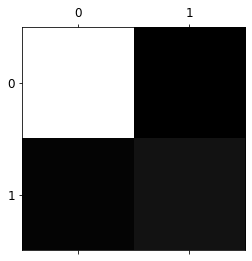

In [92]:
import matplotlib
import matplotlib.pyplot as plt
plt.matshow(M_dummy, cmap=plt.cm.gray)
plt.show()

plt.matshow(M_SGD, cmap=plt.cm.gray)
plt.show()

Here we see there are less errors in M_SGD. This is apparent by the diagonal white/grey colors.
The more white the colors of the boxes are, the more guesses are made on this assumption. 
So in the M_dummy the most guesses has been on true-positive, secondly on false-negative and zero guesses on false-positive and true-negative.
And in the M_SGD the most guesses has been on true-positive, secondly on true-negative and some guesses on false-positive and false-negative.

### Qe Conclusion
We have gained an understanding of the nomenclature; TN (true negative), TP (true positive), FP (false positive), and FN (false negative). We used these valuse to calculate the different performance metrics accruray, precision, recall, F1_score. We compared the different performance metrics with Sci-kit learns performance metrics and learned our metrics could be used as well as sci-kit learns as we learned they gave the same results. 

The confusion matrix gave us clear understanding as to why the DummyClassifier is not necessarily good even though it has a score aorund 0.9.

In [93]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## L03 - pipelines
For this exercise we will reuse the data from L01, intro.ipynb. The data has been saved as a 'pickle' file. To deserialize the data we use the python library "pickle".

In [94]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def LoadDataFromL01():
    import pickle
    filename = "../Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


#### Revisiting the problem with the MLP

Using the MLP for the QECD data in Qd) from `intro.ipynb` produced a negative $R^2$, meaning that it was unable to fit the data, and the MPL model was actually _worse_ than the naive $\hat y$ (mean value of y).

In the codecell below we plot the data once again, before we try fixing the issue.

The MLP mis-fits the data, seen in the bad R^2 score..
lin.reg.score(X, y)=0.73
MLP.score(X, y)=-4.23
OK


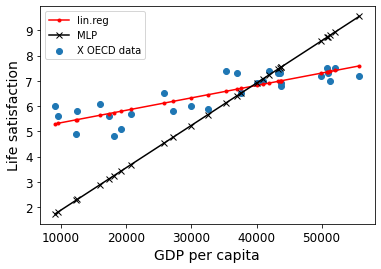

In [95]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

def PlotModels(model1, model2, X, y, name_model1="lin.reg", name_model2="MLP"):
    def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2

    y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(
        model1, model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    print(f"{name_model1}.score(X, y)={score_model1:0.2f}")
    print(f"{name_model2}.score(X, y)={score_model2:0.2f}")


# linear and MLP regressor and reduing the plots
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP mis-fits the data, seen in the bad R^2 score..")
PlotModels(linreg, mlp, X, y)

print("OK")

### Qa) Create a Min/max scaler for the MLP
The reason this misfit occures is that a neural network, such as the MLP, is usually expecting values in the range `[0;1]` or sometimes in the range `[-1;1]`.

In the previous fitting of the model we gave it values based off GDPs, meaning that the values would lie between ~9000 and ~55000. These are far from the values the neural network is expecting and this causes some trouble as is seen in the previous plot.

To fix this, we will scale the values of the dataset to fit in the expected range of the MLP. In this case we will try fitting it to `[0;1]`.

lin.reg.score(X, y)=-3.95
MLP.score(X, y)=0.72


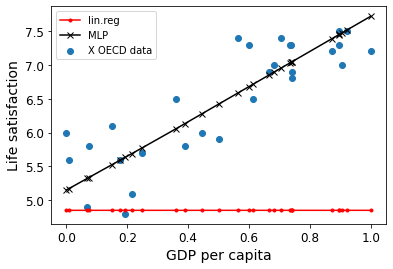

In [96]:
# Re-scaling
X_rescaled = (X - X.min()) / (X.max() - X.min())

# Fitting model with new scaled dataset
mlp.fit(X_rescaled, y)

# Plotting model again
PlotModels(linreg, mlp, X_rescaled, y )

_Note that because the function __PlotModels__ is now using the scaled dataset of X, therefore score and plot of the linear regression model can be ignored_

### Qb) Scikit-learn Pipelines

Now we will use the `sklearn.pipeline.Pipeline`. We will then give the Pipeline a scaler and a model. This will allow us to use the pipeline in the same way as we use a model, but the data will always be scaled correctly before being given to the model to train on.

Instead of using our own scaling as we did previously we will this time use the `sklearn.preprocessing.MinMaxScaler`. This uses the same method for scaling.

Now when using the __PlotModels__ function and giving it the raw X dataset, the pipe will make sure the dataset is scaled before handing it to the MLP. The linear regression model (linreg) will still train on the raw data and when plotted, it can easily be compared to the MLP.

lin.reg.score(X, y)=0.73
MLP.score(X, y)=0.71


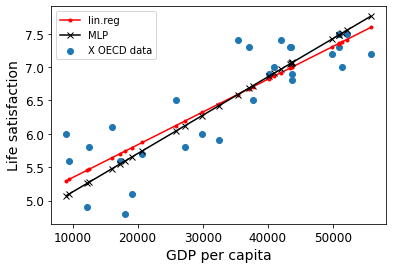

In [97]:
#refitting linreg because somehow it doesn't work without
linreg.fit(X, y)

#Creating scaler using sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))

#using pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', scaler), ('mlp', mlp)])

pipe.fit(X, y)

PlotModels(linreg, pipe, X, y)

### Qc) Outliers and the Min-max Scaler vs. the Standard Scaler

Previously we used what is called a MinMax scalar. Now we will compare it to the Standard Scalar.

MLP with MinMax scaler.score(X, y)=0.73
MLP with standard scaler.score(X, y)=0.80


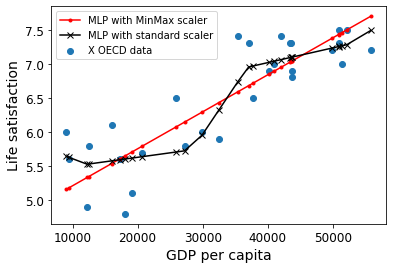

In [98]:
#New mlp to avoid two different pipes fitting same model
mlp2 = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

from sklearn.preprocessing import StandardScaler

stdScalerPipe = Pipeline([('stdScalar', StandardScaler()), ('mlp', mlp2)])

pipe.fit(X, y)
stdScalerPipe.fit(X, y)


PlotModels(pipe, stdScalerPipe, X, y, name_model1="MLP with MinMax scaler", name_model2="MLP with standard scaler")

From the plot we notice that the Standard Scaler is affected much more by the datapoints that deviate more from the mean value, or "outliers". These outlieres can depending on what data is being worked on, and the amount of data, be more or less important to allow for higher influence on the training. In our case with the Life Satisfaction/GDP we consider the Standard Scaler a better option. This is because considering that some contries can have a low GDP and still a comparetivly high lifesat, is important to include in the models training.

### Qd) Modify the MLP Hyperparameters

In the MLP from scikit-learn there are lots of parameters to tweak, to get better training for the model. We will try modifying some of the parameters to see what changes and if the score improves.

We will start by testing different amounts of neurons pr. layer.

Second we will try using a different solver, than 'adam', which was previously used.

Last we will try chaning the activation function from rectified linear unit function, to logistic sigmoid function.

Each time a new model is created we will train and plot it multiple times to see how the score will vary, without having changed the parameters again. This is to make sure we notice if some scores fluctate too much to be considered reliable.

_Notice: Looking at the score and then tweaking the parameters in the model is not recommended as this can create a model that only gets good scores on this particular dataset. __Do not attempt this at home!___

#### Testing different neuron amounts:

MLP with 2 neurons.score(X, y)=-0.01
MLP with 3 neurons.score(X, y)=0.74


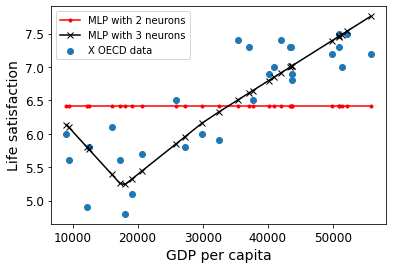

In [108]:
mlp_2_Neurons = MLPRegressor(hidden_layer_sizes=(2, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

mlp_3_Neurons = MLPRegressor(hidden_layer_sizes=(3, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe2n = Pipeline([('stdScalar', StandardScaler()), ('mlp', mlp_2_Neurons)])
pipe4n = Pipeline([('stdScalar', StandardScaler()), ('mlp', mlp_3_Neurons)])

pipe2n.fit(X, y)
pipe4n.fit(X, y)

PlotModels(pipe2n, pipe4n, X, y, name_model1="MLP with 2 neurons", name_model2="MLP with 3 neurons")

MLP with 25 neurons.score(X, y)=0.79
MLP with 1.000 neurons.score(X, y)=0.80


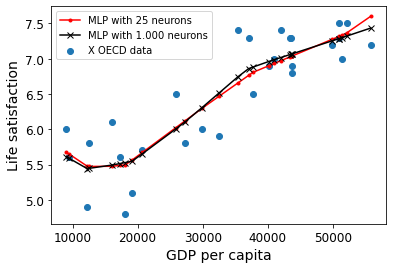

In [109]:
mlp_25_Neurons = MLPRegressor(hidden_layer_sizes=(25, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

mlp_1k_Neurons = MLPRegressor(hidden_layer_sizes=(1000, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe25n = Pipeline([('stdScalar', StandardScaler()), ('mlp', mlp_25_Neurons)])
pipe1kn = Pipeline([('stdScalar', StandardScaler()), ('mlp', mlp_1k_Neurons)])

pipe25n.fit(X, y)
pipe1kn.fit(X, y)


PlotModels(pipe25n, pipe1kn, X, y, name_model1="MLP with 25 neurons", name_model2="MLP with 1.000 neurons")

#### Observations on testing different neurons amounts

After having decreased and increased the amount of neurons used in our model we noticed some patterns occuring.

- Going down to only __two__ neurons results in the score often being negative, and only sometimes scoring above __.70__
 - Increasing to __three__ neurons results in __.70 < scores <.74__, meaning that three neurons is the minimum required for this dataset

- The neuron count has to be increased to __25__, before a noticable improvement is seen.
 - Although the improvement is still only a score that is consistently __0.80__

- Increasing the neuron count to __1000__ does not improve the score beyond __.80__

#### Testing different solver:

MLP with adam solver.score(X, y)=0.79
MLP with sgd solver.score(X, y)=0.18


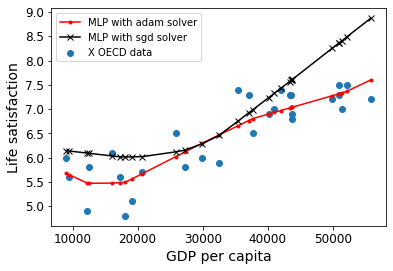

In [112]:
#Testing mlp with 'sgd' solver
mlp_sgd = MLPRegressor(hidden_layer_sizes=(25, ),
                   solver='sgd',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
pipeSgd = Pipeline([('stdScalar', StandardScaler()), ('mlp', mlp_sgd)])

pipeSgd.fit(X, y)

PlotModels(pipe25n, pipeSgd, X, y, name_model1="MLP with adam solver", name_model2="MLP with sgd solver")

#### Observations on testing different solver:

The stochastic gradient descent came up with a score much worse than previously used solver ("stochastic gradient-based optimizer" proposed by Kingma or "adam").

#### Testing with 'sigmoid' activaton function

MLP with relu activator.score(X, y)=0.73
MLP with sigmoid activator.score(X, y)=0.74


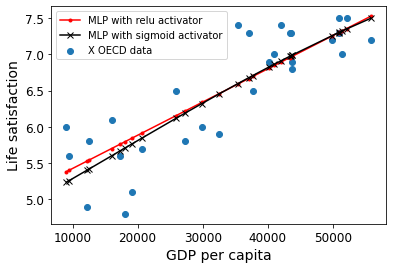

In [113]:
#Testing with 'sigmoid' activator
mlp_log = MLPRegressor(hidden_layer_sizes=(25, ),
                   solver='adam',
                   activation='logistic',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
pipeLog = Pipeline([('stdScalar', StandardScaler()), ('mlp', mlp_log)])

pipe2n.fit(X, y)
pipeLog.fit(X, y)

PlotModels(pipe2n, pipeLog, X, y, name_model1="MLP with relu activator", name_model2="MLP with sigmoid activator")


#### Observations on testing with 'sigmoid' activation function
- After training the model with 25 neurons generates a very consistent score of __.74__ each time it was trained

- Increasing or decreasing the number of neurons destabilises this score and the fit becomes more and more random

- Increasing the neuron count to past 1000 always results in a negative score 